## Exploratory Data Analysis ##

In [1]:
#import necessary programs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
plt.style.use('seaborn')

In [2]:
#review preprocessed dataframe
df = pd.read_csv('./data/preprocessing.csv')
df.head()
df.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'year_sold', 'month_sold', 'year_built', 'year_renovated',
       'Geo_Clusters'],
      dtype='object')

In [3]:
#drop unnamed index added when saving 
df=df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,year_sold,month_sold,year_built,year_renovated,Geo_Clusters
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1340,5650,2014,10,5.0,12,5
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1690,7639,2014,12,5.0,9,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,2720,8062,2015,2,3.0,12,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1360,5000,2014,12,6.0,12,5
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1800,7503,2015,2,8.0,12,6


### Normalization, Linearity, and Feature Selection ###

In this portion of the analysis I will be looking thru the cleaned and processed data and starting to make something meaninful from it. the first thing I'll do is sort through the data and attempt to normalize it while still maintaining interpretability, as well as checking linearity.

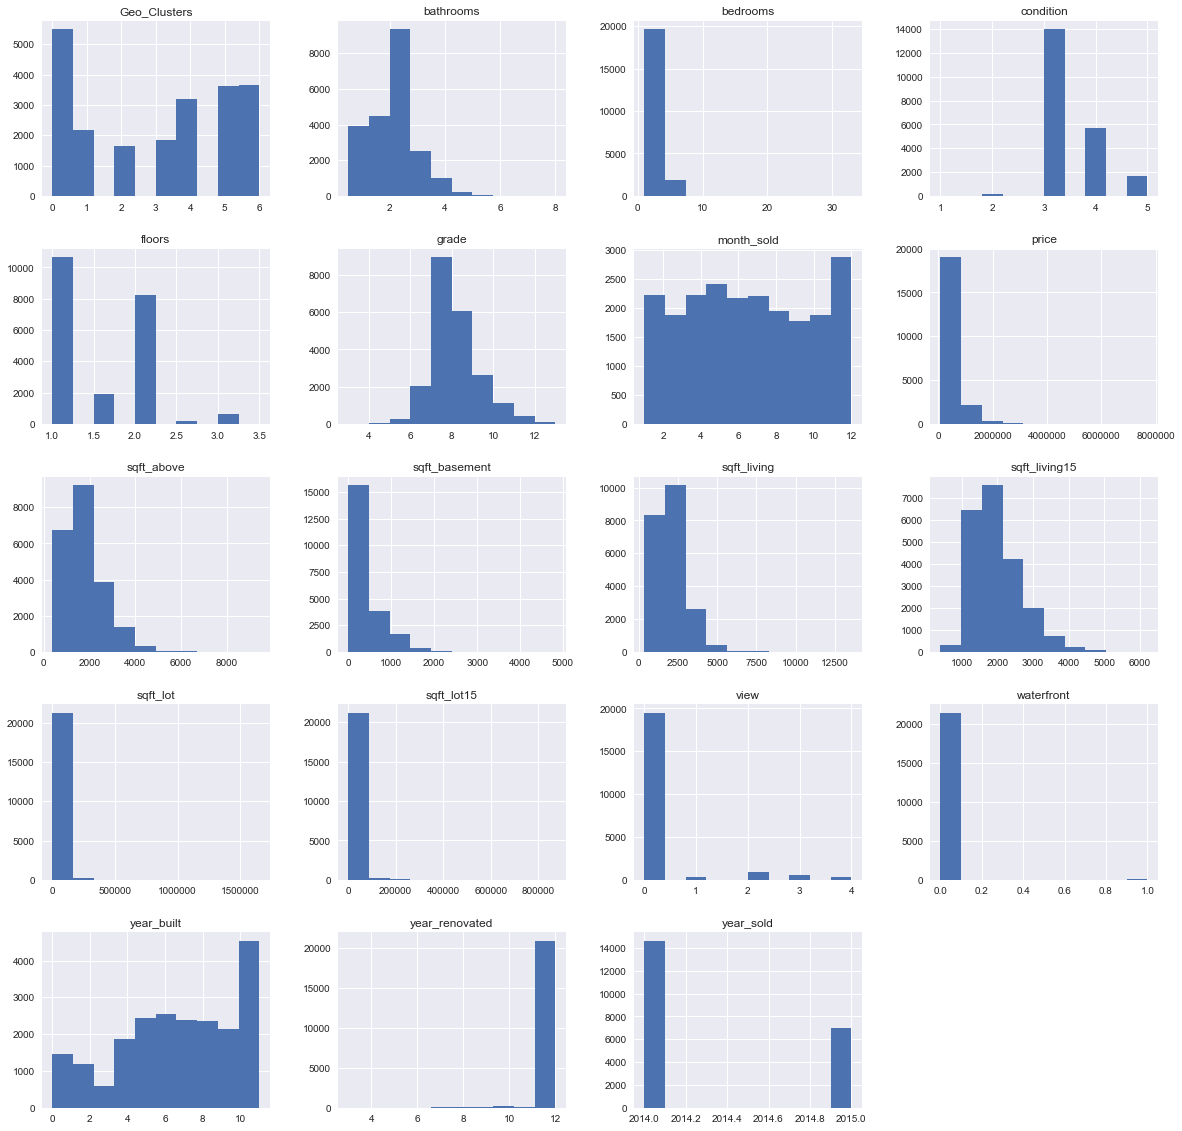

In [5]:
#Visualize data and begin to assess which features need tinkering 
df.hist(figsize=[20,20]);

Much of the continuous data has a presence of skewness. This needs to be addressed for accurate modeling.

#### Feature Selection of Continuous Data ####

In order to address skewness I will limit the data included in the study. This problem could likely be solved using natural logs or other normalization techniques but I would prefer to decrease the scope of the model and maintain interpretibility, especially because my target audience is looking for fixer-uppers (less expensive) homes. 

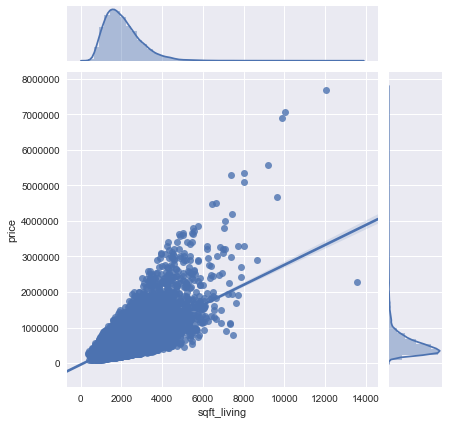

In [6]:
#I'll user jointplots to visualize the linearity and the distribution curve. 
sns.jointplot('sqft_living','price', data=df, kind='reg');

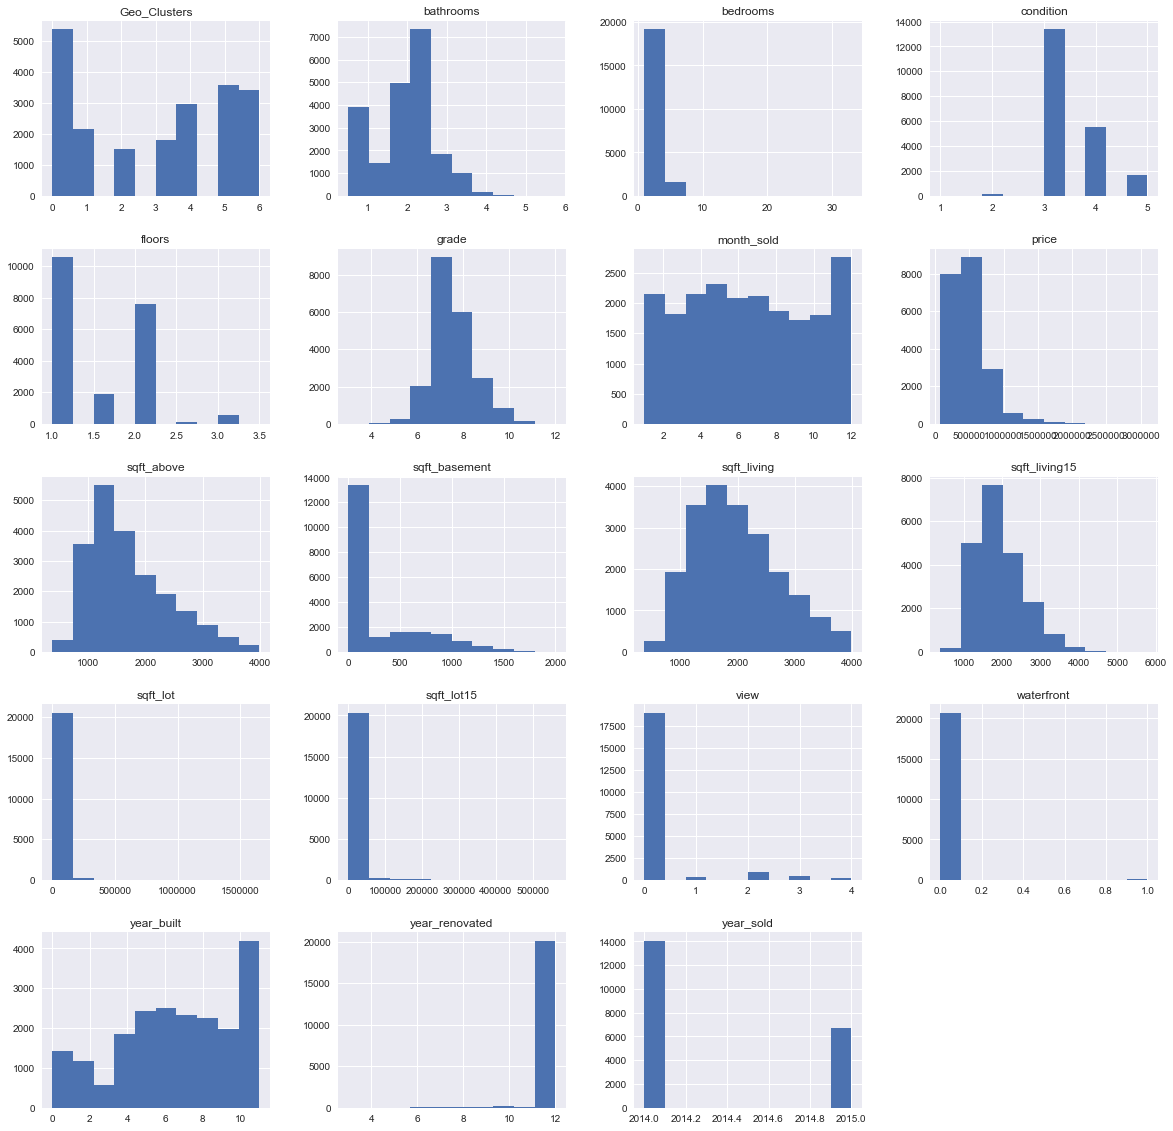

In [7]:
#let's cut it off at 4,000 sqft
df_filtered = df[df['sqft_living']<4000]
df_filtered.hist(figsize=[20,20]);

It is important to note that I will perform these modifications one at a time beacuse they may effect some of the other independent variables skewness (e.g. if I limit the square footage of the houses included, the houses which include 30 bedrooms will likely be excluded).

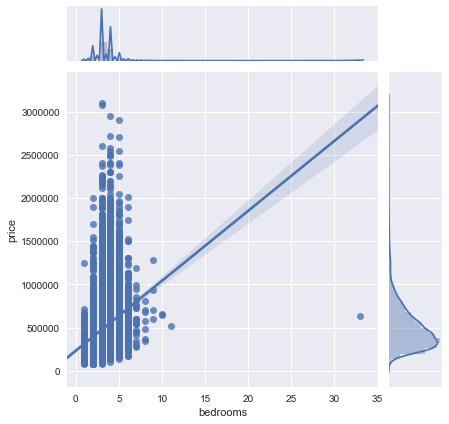

In [8]:
#that's better, but some could still improve. 
sns.jointplot('bedrooms','price', data=df_filtered, kind='reg');

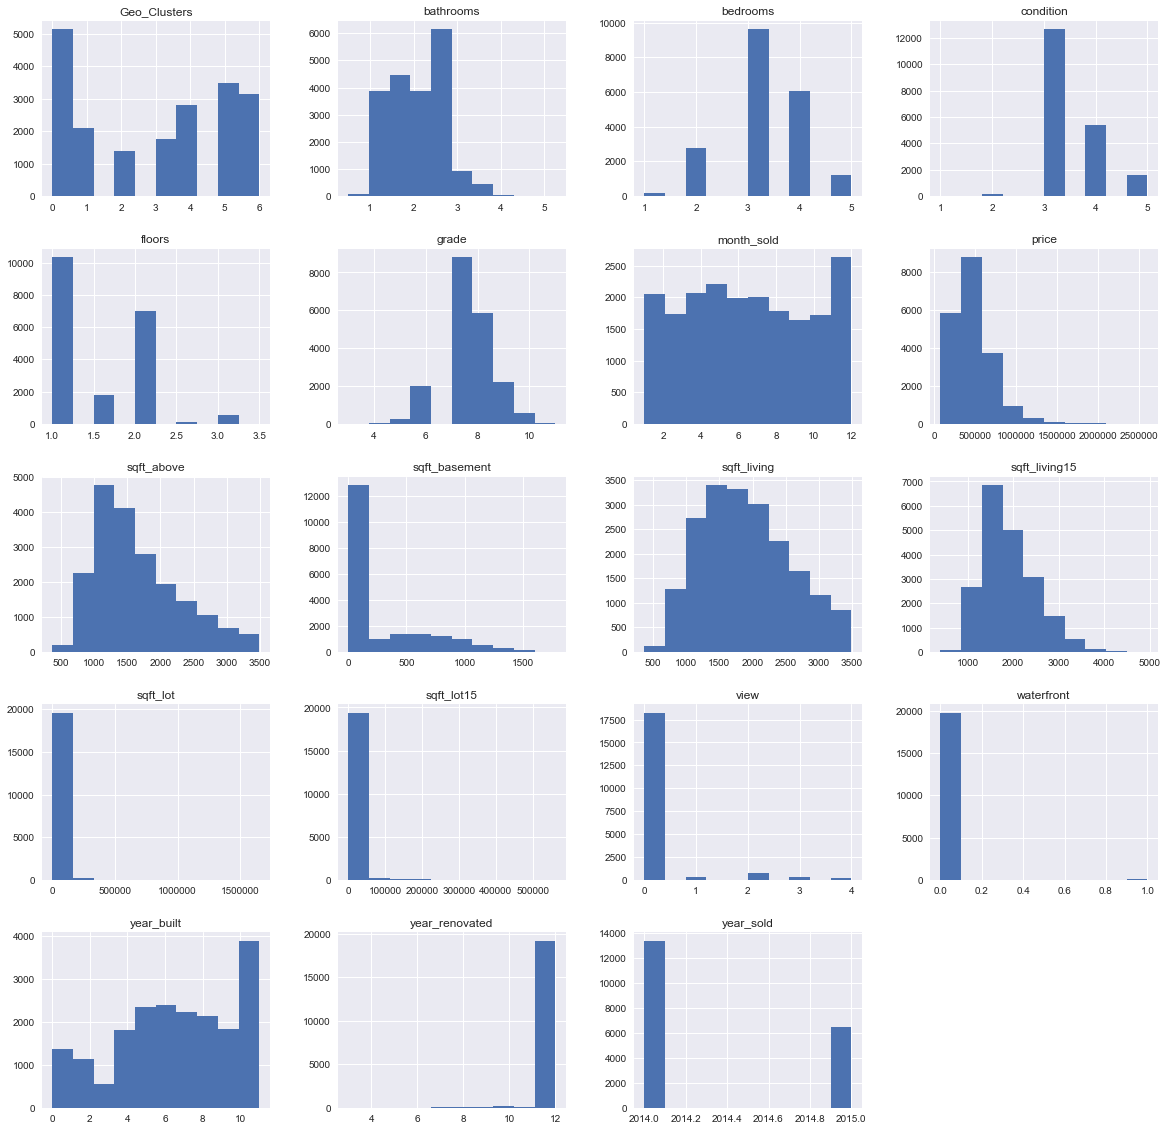

In [9]:
#let's cut this off at 5
df_filtered = df[(df['sqft_living']<3500) & (df['bedrooms']<6)]
df_filtered.hist(figsize=[20,20]);

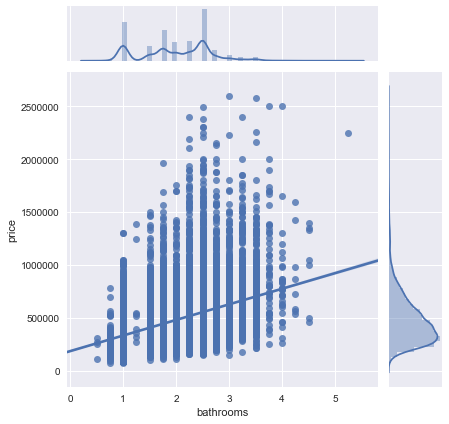

In [10]:
#better, let's continue
sns.jointplot('bathrooms','price', data=df_filtered, kind='reg');

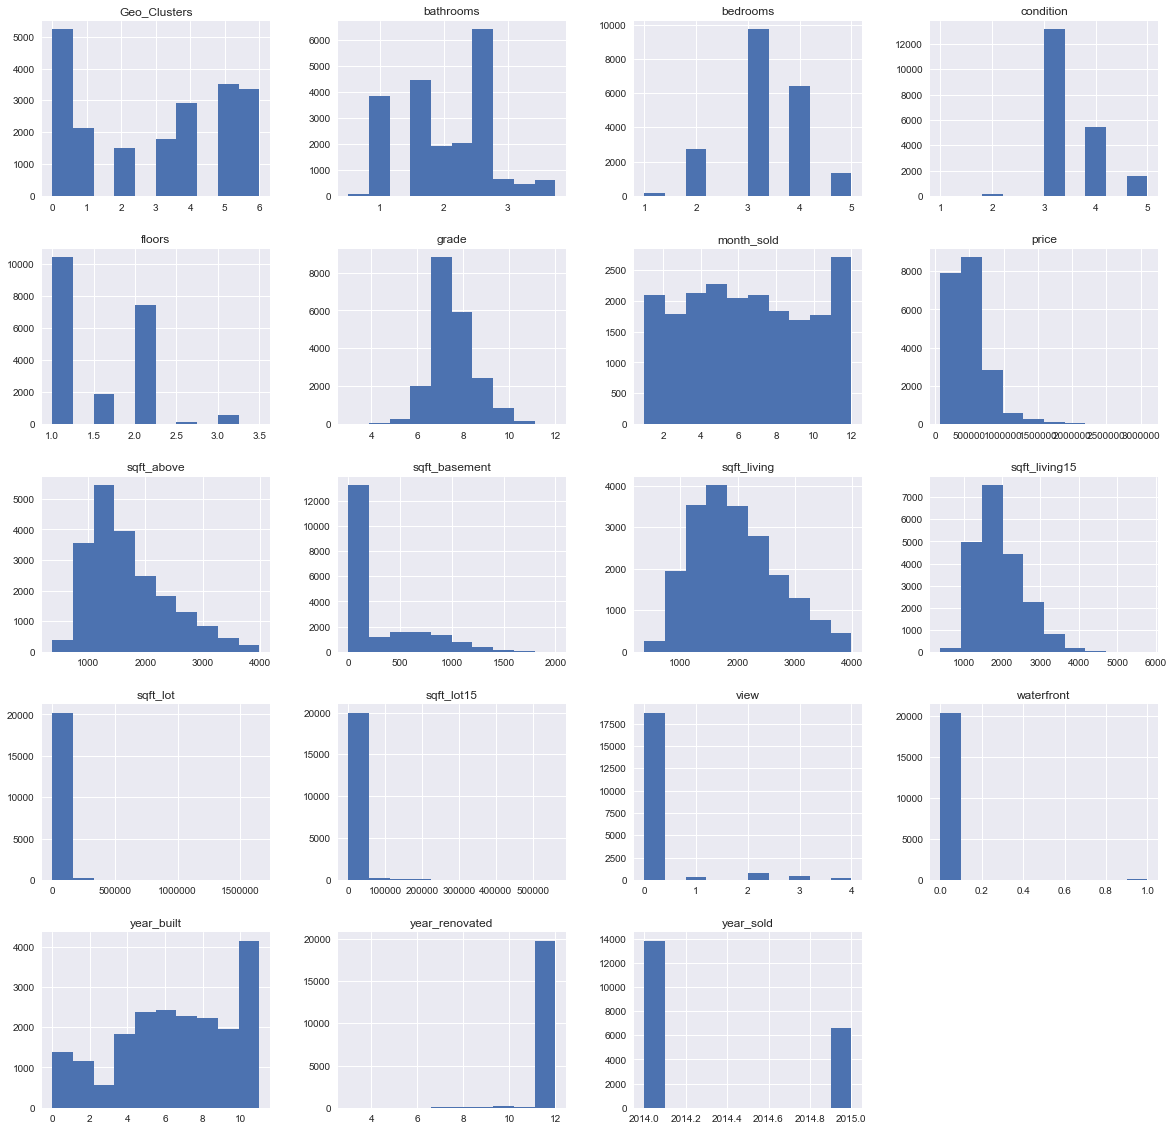

In [11]:
#let's cut it off at 3 bathrooms
df_filtered = df[(df['sqft_living']<4000) & (df['bedrooms']<6) & (df['bathrooms']<4)]
df_filtered.hist(figsize=[20,20]);

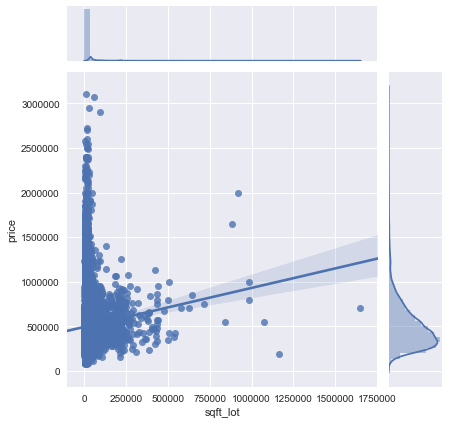

In [12]:
#Let's keep going. 
sns.jointplot('sqft_lot','price', data=df_filtered, kind='reg');

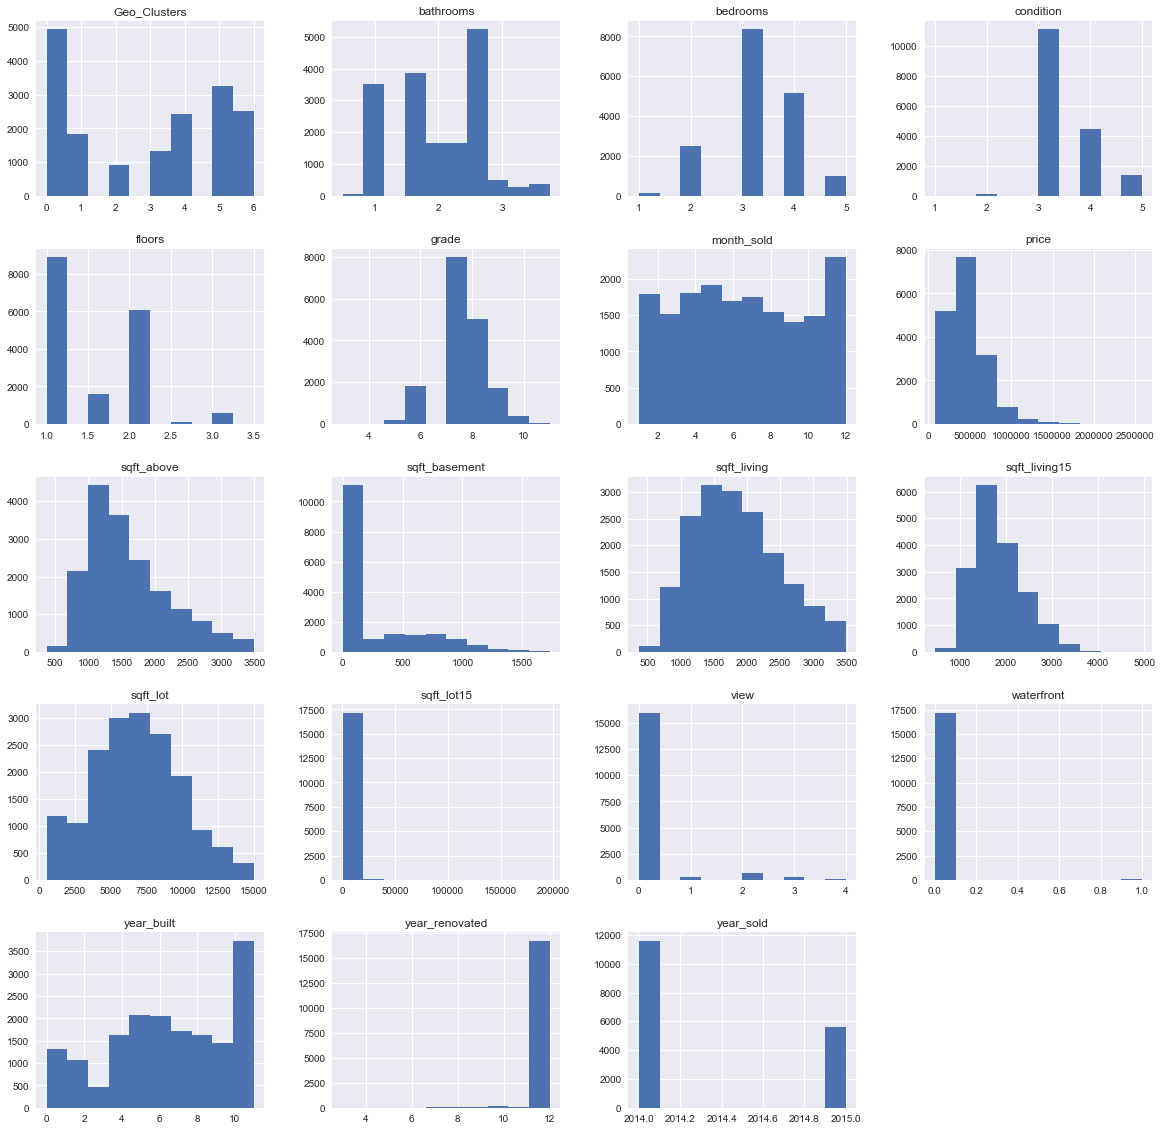

In [13]:
#let's cut it off at 15,000
df_filtered = df[(df['sqft_living']<3500) & (df['bedrooms']<6) & (df['bathrooms']<4) & (df['sqft_lot'] <15000)]
df_filtered.hist(figsize=[20,20]);

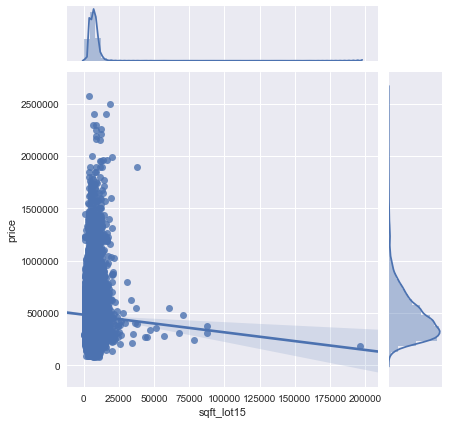

In [14]:
#Once more
sns.jointplot('sqft_lot15','price', data=df_filtered, kind='reg');

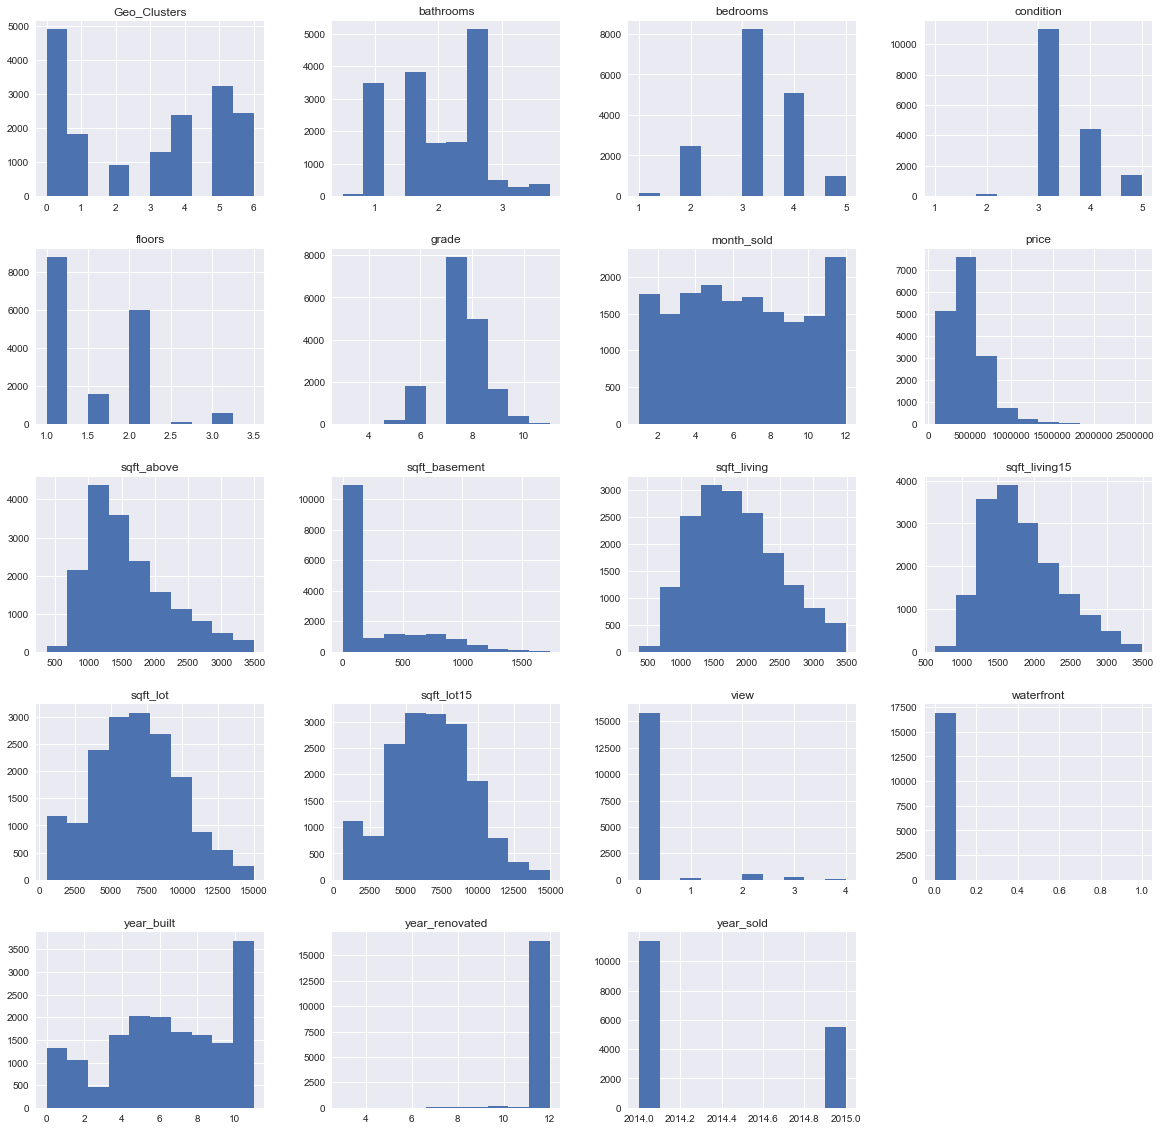

In [15]:
df_filtered = df[(df['sqft_living']<3500) & (df['bedrooms']<6) & (df['bathrooms']<4) & (df['sqft_lot'] <15000) &
                (df['sqft_lot15']<15000) & (df['sqft_living15']<3500)]
df_filtered.hist(figsize=[20,20]);

#### Feature selection of categorical data ####

In order to address this, I'll look at boxplots of all the categorical data and delete any categories that are not impactful (means too similar).

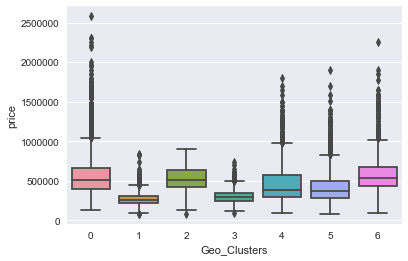

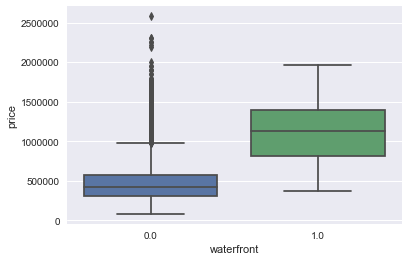

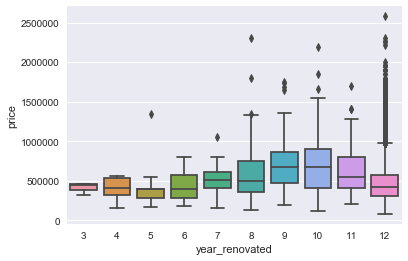

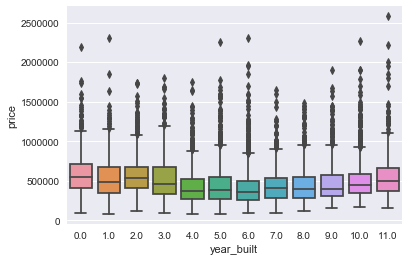

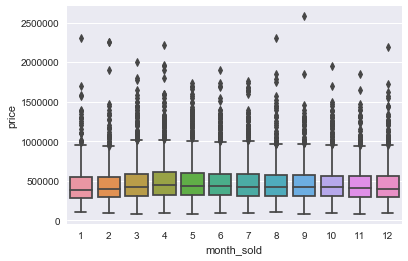

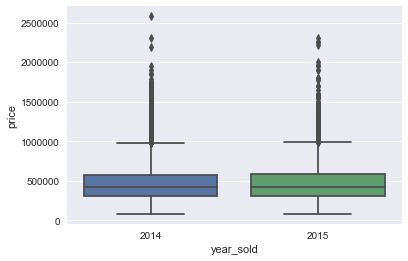

In [16]:
categoricals = ['Geo_Clusters','waterfront','year_renovated','year_built','month_sold','year_sold']



for i,feat in enumerate(categoricals): #creating boxplots of every categorical feature
        plt.figure(i)
        sns.boxplot(x=feat, y='price', data=df_filtered);

In [17]:
#year_sold seems to be the least important - we'll drop it.
#geo_clusters seems to have quite a lot of variability as well
df_filtered = df_filtered.drop(['year_sold'], axis=1)
df_filtered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,month_sold,year_built,year_renovated,Geo_Clusters
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1340,5650,10,5.0,12,5
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1690,7639,12,5.0,9,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,2720,8062,2,3.0,12,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1360,5000,12,6.0,12,5
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1800,7503,2,8.0,12,6


#### Checking for multicollinearity ####

In this sort of dataset I expect to find a few instances of multicollinearity, let's look.

In [18]:
corr=df_filtered.corr().abs()
c = corr.unstack()
co = c.sort_values(kind='quicksort')
corr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,month_sold,year_built,year_renovated,Geo_Clusters
price,1.000000,0.247542,0.382425,0.559273,0.050468,0.235315,0.115890,0.304655,0.075351,0.586167,0.433992,0.245752,0.488908,0.056213,0.022531,0.033858,0.081000,0.041381
bedrooms,0.247542,1.000000,0.469942,0.618008,0.219919,0.143738,0.014288,0.032271,0.033712,0.321406,0.487641,0.257203,0.404102,0.201237,0.001091,0.170206,0.017849,0.066330
bathrooms,0.382425,0.469942,1.000000,0.691328,0.067607,0.517576,0.006197,0.087231,0.133894,0.595163,0.606518,0.192109,0.512615,0.073294,0.011021,0.548358,0.004334,0.056951
sqft_living,0.559273,0.618008,0.691328,1.000000,0.186168,0.326053,0.026736,0.168547,0.045597,0.661925,0.821958,0.367496,0.724755,0.164139,0.010378,0.317989,0.018817,0.078698
sqft_lot,0.050468,0.219919,0.067607,0.186168,1.000000,0.408467,0.030837,0.032352,0.141838,0.001742,0.141405,0.087579,0.227505,0.887314,0.006578,0.077230,0.004835,0.174878


In [19]:
co.loc[co >= .75]

sqft_living     sqft_above        0.821958
sqft_above      sqft_living       0.821958
sqft_lot        sqft_lot15        0.887314
sqft_lot15      sqft_lot          0.887314
price           price             1.000000
year_built      year_built        1.000000
bedrooms        bedrooms          1.000000
bathrooms       bathrooms         1.000000
sqft_living     sqft_living       1.000000
sqft_lot        sqft_lot          1.000000
floors          floors            1.000000
waterfront      waterfront        1.000000
year_renovated  year_renovated    1.000000
view            view              1.000000
grade           grade             1.000000
sqft_above      sqft_above        1.000000
sqft_basement   sqft_basement     1.000000
sqft_living15   sqft_living15     1.000000
sqft_lot15      sqft_lot15        1.000000
month_sold      month_sold        1.000000
condition       condition         1.000000
Geo_Clusters    Geo_Clusters      1.000000
dtype: float64

There are four features that are causing multicolinearity above. With data such as housing data this is expected - of course there is a correlation between the sqaure footage of a house and the square footage above ground. Regardless, to increase accuracy of my model I'd like to eliminate this. I'll delete sqft_above and sqft_lot15 because I think their counterparts are more useful. 

In [20]:
df_filtered =df_filtered.drop(['sqft_above','sqft_lot15'], axis=1)
corr=df_filtered.corr().abs()
c = corr.unstack()
co = c.sort_values(kind='quicksort')
co.loc[co >= .75]

price           price             1.0
year_built      year_built        1.0
month_sold      month_sold        1.0
sqft_living15   sqft_living15     1.0
sqft_basement   sqft_basement     1.0
grade           grade             1.0
condition       condition         1.0
view            view              1.0
waterfront      waterfront        1.0
floors          floors            1.0
sqft_lot        sqft_lot          1.0
sqft_living     sqft_living       1.0
bathrooms       bathrooms         1.0
bedrooms        bedrooms          1.0
year_renovated  year_renovated    1.0
Geo_Clusters    Geo_Clusters      1.0
dtype: float64

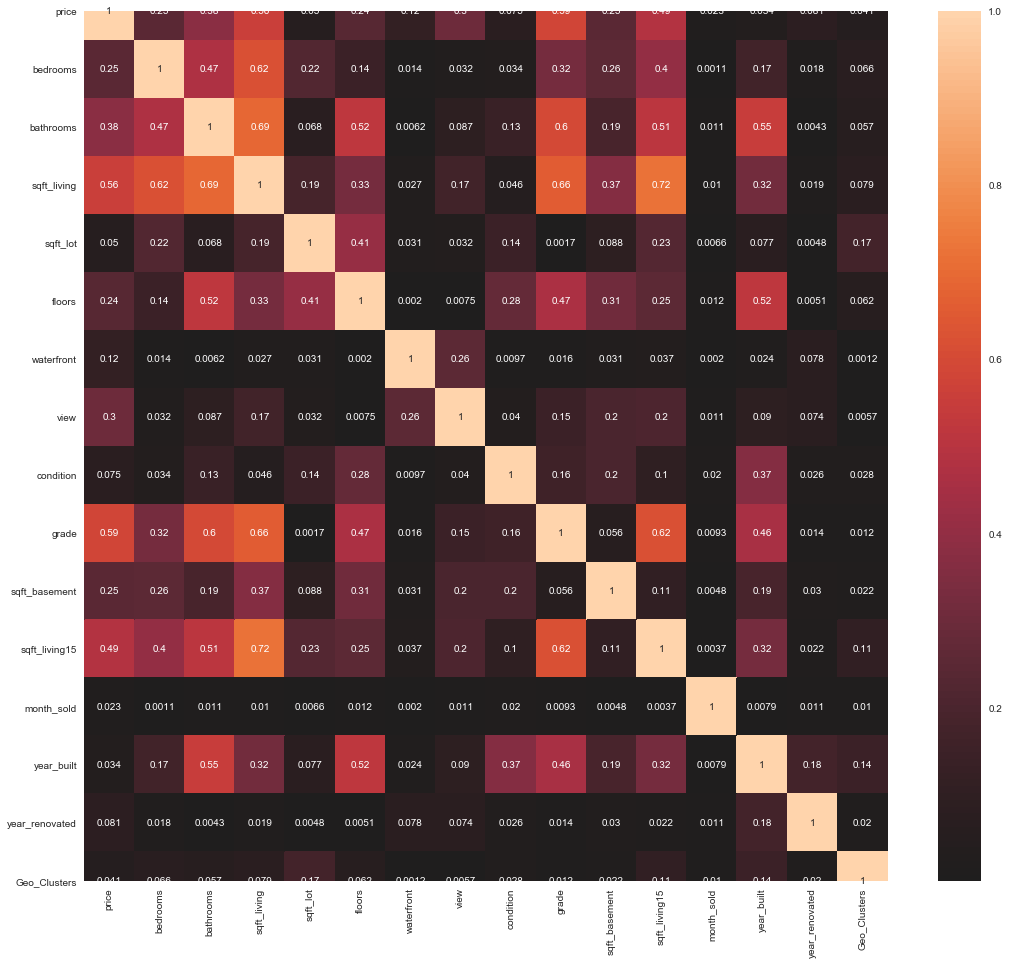

In [21]:
fig, ax = plt.subplots(figsize=(18,16))        
sns.heatmap(corr, center=0, annot=True, ax=ax) #will demonstrate a colored display of correlation

In [22]:
print(df_filtered.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'sqft_living15', 'month_sold', 'year_built', 'year_renovated',
       'Geo_Clusters'],
      dtype='object')


#### Cont'd Exploration - What does all of this mean? ####

Now that the data is whiddled down to what I think will go into the model, let's do further exploration. I'd like to ask some pointed questions that will inform what I look for in the model. 

1. Which features are most correlated with price?
2. Is renovation or location more important?

#### 1. Which features are most correlated with price? ####

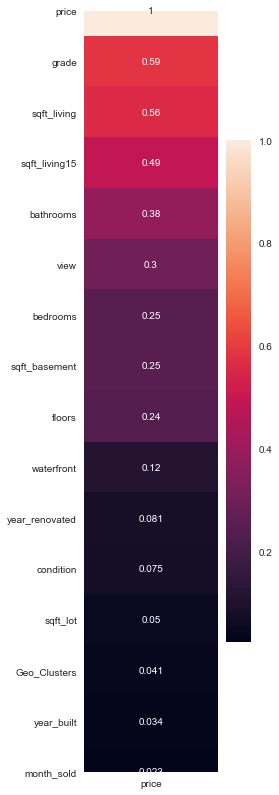

In [23]:
price_cor = pd.DataFrame(corr['price']) #finding correlations with just price
price_cor.sort_values('price', ascending = False, inplace = True)


fig = plt.figure(figsize=(3,14))
sns.heatmap(price_cor, annot=True)

Of all the continuous data it appears that **grade, sqft_living, and sqft_living15** have the most significant effect on price. Let's explore how much of the data just these three factors explain. 

In [24]:
#Let's explore a model with just these three features
from statsmodels.formula.api import ols
model_top3 = ols(formula = 'price ~ grade + sqft_living + sqft_living15', data=df_filtered).fit()
model_top3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     3727.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:24:48   Log-Likelihood:            -2.2889e+05
No. Observations:               16945   AIC:                         4.578e+05
Df Residuals:                   16941   BIC:                         4.578e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.288e+05   1.18e+04    -36.347      0.000   -4.52e+05   -4.06e+05
grade          9.025e+04   2032.740     44.397      0.000    8.63e+04    9.42e+04
sqft_living      96.0236      3.349     28.676      0.000      89.460     102.587
sqft_living15    27.7300      3.911      7.090      0.000      20.063      35.397
==============================================================================
Omnibus:                     4938.833   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22604.001
Skew:                           1.354   Prob(JB):                         0.00
Kurtosis:                       7.968   Cond. No.                     2.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looks like these three features can explain 40% of our price data. 

In [25]:
df_filtered.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'sqft_living15', 'month_sold', 'year_built', 'year_renovated',
       'Geo_Clusters'],
      dtype='object')

#### What's more important - the renovation or choosing the right location? ####

Using the same thought process as above, let's explore weather renovation or location should be the first priority. 

In [40]:
# renovation features 
model_reno = ols(formula = 'price ~ bedrooms + bathrooms + sqft_living + floors + condition + grade', data=df_filtered).fit()
model_reno.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     2135.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:11:27   Log-Likelihood:            -2.2842e+05
No. Observations:               16945   AIC:                         4.568e+05
Df Residuals:                   16938   BIC:                         4.569e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.002e+05   1.55e+04    -38.690      0.000   -6.31e+05    -5.7e+05
bedrooms    -3.073e+04   2141.160    -14.352      0.000   -3.49e+04   -2.65e+04
bathrooms   -2.864e+04   3111.407     -9.204      0.000   -3.47e+04   -2.25e+04
sqft_living   146.1873      3.648     40.075      0.000     139.037     153.338
floors       2628.6223   3044.678      0.863      0.388   -3339.263    8596.507
condition    5.449e+04   2128.003     25.606      0.000    5.03e+04    5.87e+04
grade        1.032e+05   2072.398     49.806      0.000    9.92e+04    1.07e+05
==============================================================================
Omnibus:                     4895.861   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23696.791
Skew:                           1.322   Prob(JB):                         0.00
Kurtosis:                       8.154   Cond. No.                     2.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Location features
model_loc = ols(formula = 'price ~ sqft_lot + sqft_living15 + waterfront + Geo_Clusters', data=df_filtered).fit()
model_loc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1734.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:11:21   Log-Likelihood:            -2.2766e+05
No. Observations:               16945   AIC:                         4.553e+05
Df Residuals:                   16935   BIC:                         4.554e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.935e+05   5393.167     35.884      0.000    1.83e+05    2.04e+05
waterfront[T.1.0]  5.685e+05   3.13e+04     18.141      0.000    5.07e+05     6.3e+05
Geo_Clusters[T.1] -3.012e+05   4724.844    -63.742      0.000    -3.1e+05   -2.92e+05
Geo_Clusters[T.2] -1.559e+05   6146.404    -25.372      0.000   -1.68e+05   -1.44e+05
Geo_Clusters[T.3] -3.093e+05   5231.758    -59.120      0.000    -3.2e+05   -2.99e+05
Geo_Clusters[T.4] -1.722e+05   4368.328    -39.420      0.000   -1.81e+05   -1.64e+05
Geo_Clusters[T.5] -1.164e+05   3772.382    -30.866      0.000   -1.24e+05   -1.09e+05
Geo_Clusters[T.6] -6.532e+04   4359.966    -14.981      0.000   -7.39e+04   -5.68e+04
sqft_lot             -5.1039      0.466    -10.947      0.000      -6.018      -4.190
sqft_living15       235.4639      2.629     89.567      0.000     230.311     240.617
==============================================================================
Omnibus:                     6988.483   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55539.112
Skew:                           1.786   Prob(JB):                         0.00
Kurtosis:                      11.118   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Location Location Location**.This might have already felt like common sense but the location of the house matters more than what you do with the house itself. Features like waterfront and the square footage of the other houses around have a huge impact on the value of the house. 

#### Where are the most expensive houses? ####

In [28]:
#for this we'll go back to our original housing data with the lat/long still in it. 
df_orig = pd.read_csv('kc_house_data.csv')
print(df_orig.price.median())
df_bougie = df_orig.loc[df_orig.price > 1000000] #we will look at all homes over 1 million dollars
print(len(df_bougie))

450000.0
1458


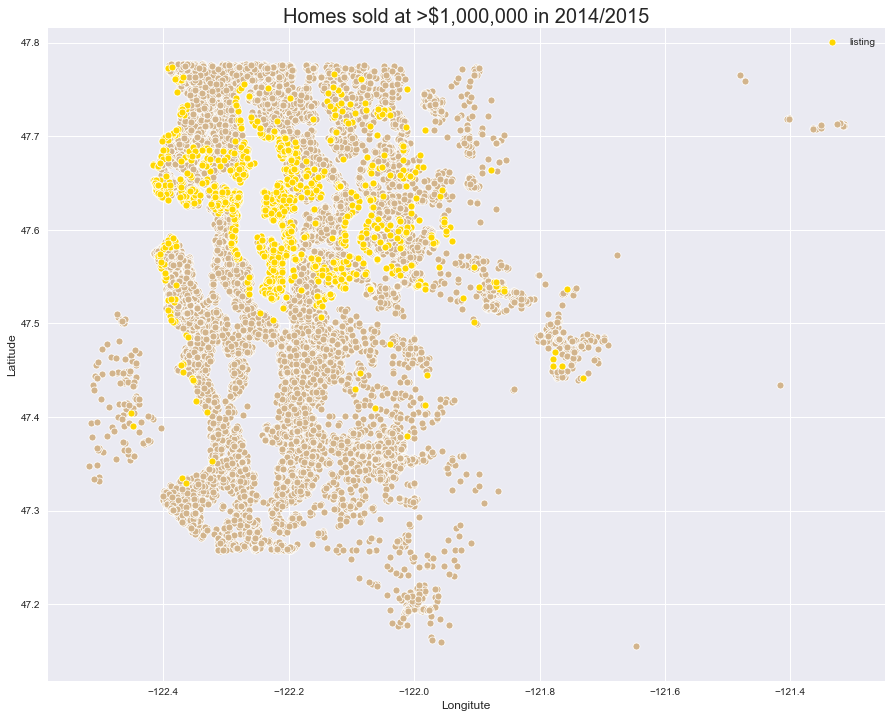

In [69]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df_orig['long'], y=df_orig['lat'], color ='tan')
sns.scatterplot(x=df_bougie['long'], y=df_bougie['lat'], color='gold', label = 'listing')
plt.title('Homes sold at >$1,000,000 in 2014/2015', fontsize=20)
plt.legend()
plt.xlabel('Longitute', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

Although some of the homes on this map probably aren't included in the dataset which will eventually inform the prediction model, it still confirms how deeply important location is. Apparently in King County, WA the people **love their water view**.

#### What is the distribution of grade levels on the map? ####

At this point grade has the highest correlation to price. Let's explore where they are on the map.

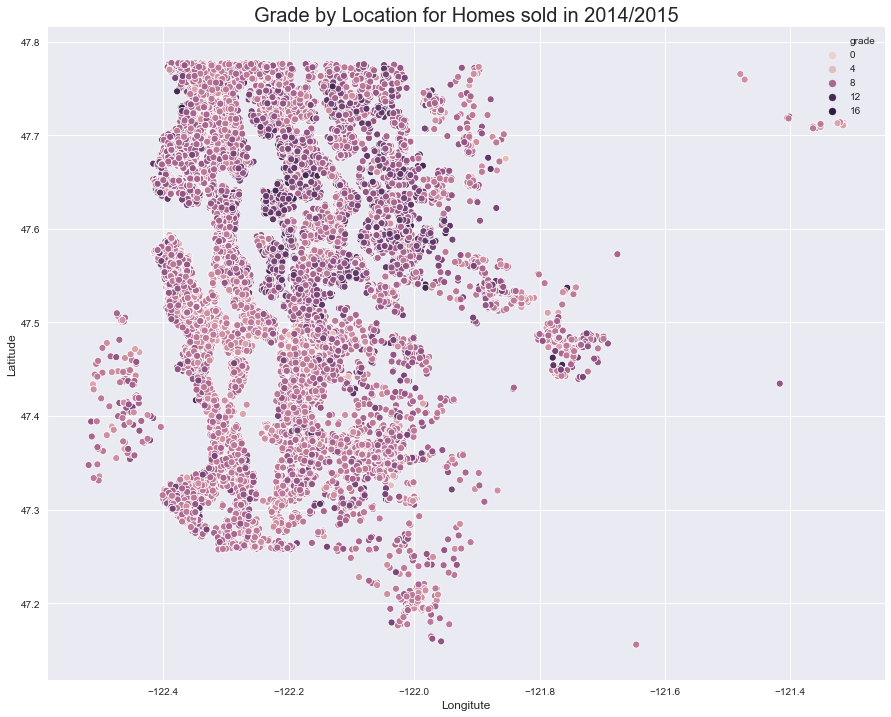

In [42]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df_orig['long'], y=df_orig['lat'], hue=df_orig['grade'])
plt.title('Grade by Location for Homes sold in 2014/2015', fontsize=20)
plt.legend()
plt.xlabel('Longitute', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

What's more important, bedrooms or bathrooms?

In [53]:
df_cheap = df_filtered[(df_filtered['price']<1000000)]

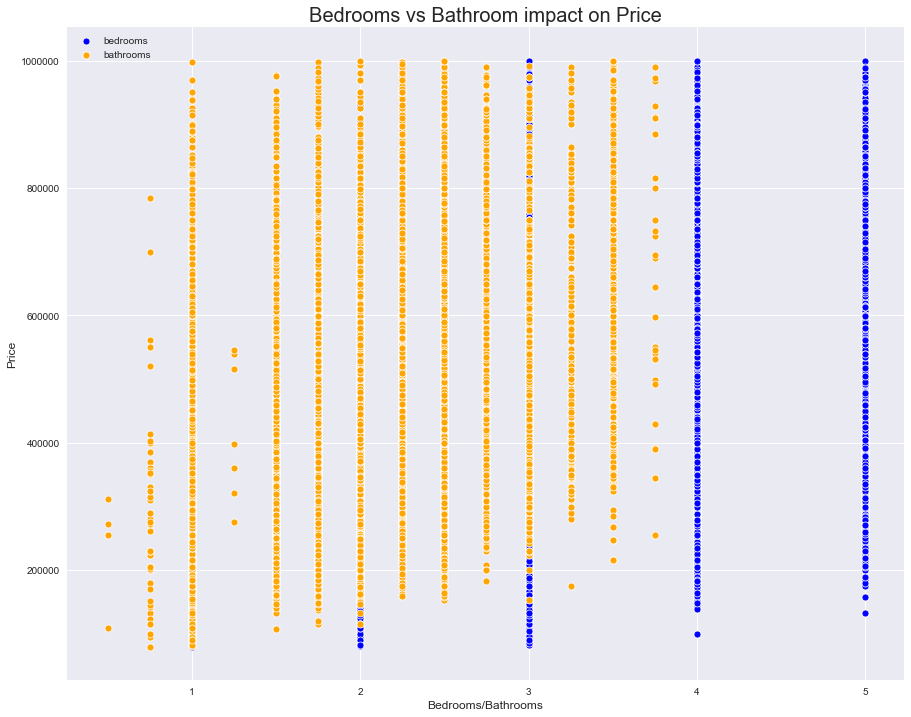

In [54]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df_cheap['bedrooms'], y=df_cheap['price'], color ='blue', label = 'bedrooms')
sns.scatterplot(x=df_cheap['bathrooms'], y=df_cheap['price'], color='orange', label = 'bathrooms')
plt.title('Bedrooms vs Bathroom impact on Price', fontsize=20)
plt.legend()
plt.xlabel('Bedrooms/Bathrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

Is it important to sell the home in a certain month?

In [66]:
df_date = pd.read_csv('./data/orig_date.csv')
df_date.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


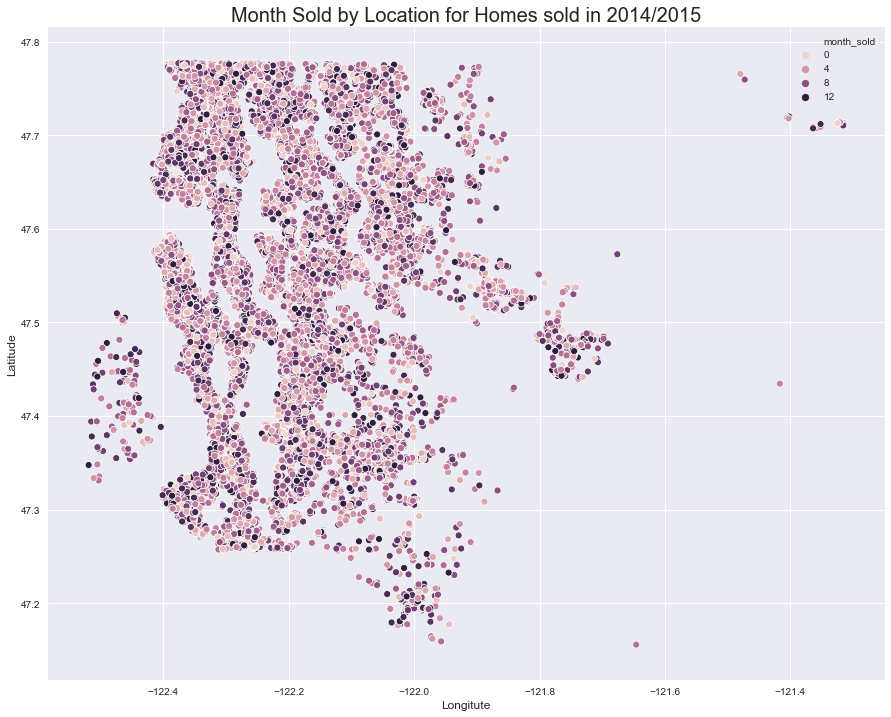

In [70]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df_date['long'], y=df_date['lat'], hue=df_date['month_sold'])
plt.title('Month Sold by Location for Homes sold in 2014/2015', fontsize=20)
plt.legend()
plt.xlabel('Longitute', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

#### One - Hot - Encoding ####

In [31]:
#switch the categorical data to string so it can be encoded 
categoricals = ['Geo_Clusters','year_renovated','waterfront','year_built','month_sold']

df_filtered[categoricals] = df_filtered[categoricals].astype(str)

In [32]:
df_filtered.info()
#Saving preprocessed data, ready for EDA 
df_filtered.head()
df_filtered.to_csv('./data/no-dummies.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16945 entries, 0 to 21596
Data columns (total 16 columns):
price             16945 non-null float64
bedrooms          16945 non-null int64
bathrooms         16945 non-null float64
sqft_living       16945 non-null int64
sqft_lot          16945 non-null int64
floors            16945 non-null float64
waterfront        16945 non-null object
view              16945 non-null float64
condition         16945 non-null int64
grade             16945 non-null int64
sqft_basement     16945 non-null float64
sqft_living15     16945 non-null int64
month_sold        16945 non-null object
year_built        16945 non-null object
year_renovated    16945 non-null object
Geo_Clusters      16945 non-null object
dtypes: float64(5), int64(6), object(5)
memory usage: 2.8+ MB


In [33]:
#get the dummie values and create a new dataframe w/ cont and cate dummy data 
dummies = pd.get_dummies(df_filtered[categoricals], prefix=categoricals, drop_first=True)

df_model = df_filtered.drop(categoricals, axis=1)

df_model = pd.concat([df_model, dummies], axis=1)

df_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,month_sold_11,month_sold_12,month_sold_2,month_sold_3,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
df_model.columns
len(df_model)

16945

In [35]:
df_model=df_model.rename(columns={'waterfront_1.0':'waterfront_1'})
df_model['waterfront_1'].value_counts()

0    16917
1       28
Name: waterfront_1, dtype: int64

In [36]:
df_model=df_model.rename(columns={'year_built_1.0':'year_built_1','year_built_2.0':'year_built_2',
                         'year_built_3.0':'year_built_3','year_built_4.0':'year_built_4',
                        'year_built_5.0':'year_built_5','year_built_6.0':'year_built_6',
                        'year_built_7.0':'year_built_7','year_built_8.0':'year_built_8',
                        'year_built_9.0':'year_built_9','year_built_10.0':'year_built_10',
                                  'year_built_11.0':'year_built_11'})


In [37]:
df_model.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'sqft_living15',
       'Geo_Clusters_1', 'Geo_Clusters_2', 'Geo_Clusters_3', 'Geo_Clusters_4',
       'Geo_Clusters_5', 'Geo_Clusters_6', 'year_renovated_11',
       'year_renovated_12', 'year_renovated_3', 'year_renovated_4',
       'year_renovated_5', 'year_renovated_6', 'year_renovated_7',
       'year_renovated_8', 'year_renovated_9', 'waterfront_1', 'year_built_1',
       'year_built_10', 'year_built_11', 'year_built_2', 'year_built_3',
       'year_built_4', 'year_built_5', 'year_built_6', 'year_built_7',
       'year_built_8', 'year_built_9', 'year_built_nan', 'month_sold_10',
       'month_sold_11', 'month_sold_12', 'month_sold_2', 'month_sold_3',
       'month_sold_4', 'month_sold_5', 'month_sold_6', 'month_sold_7',
       'month_sold_8', 'month_sold_9'],
      dtype='object')

In [38]:
#Saving preprocessed data, ready for EDA 
df_model.to_csv('./data/EDA.csv')